## Applications of Deep Neural Networks


##Convolutional Neural Networks (CNNs)
The convolutional neural network (CNN) is a neural network technology that has profoundly impacted the area of computer vision (CV). Fukushima (1980) [Cite:fukushima1980neocognitron] introduced the original concept of a convolutional neural network, and LeCun, Bottou, Bengio & Haffner (1998) [Cite:lecun1995convolutional] greatly improved this work. From this research, Yan LeCun introduced the famous LeNet-5 neural network architecture. This chapter follows the LeNet-5 style of convolutional neural network.
Although computer vision primarily uses CNNs, this technology has some application outside of the field. You need to realize that if you want to utilize CNNs on non-visual data, you must find a way to encode your data so that it can mimic the properties of visual data.

CNNs are somewhat similar to the self-organizing map (SOM) architecture that we examined in Chapter 2, “Self-Organizing Maps.” The order of the vector elements is crucial to the training. In contrast, most neural networks that are not CNNs or SOMs treat their input data as a long vector of values, and the order that you arrange the incoming features in this vector is irrelevant. For these types of neural networks, you cannot change the order after you have trained the network. In other words, CNNs and SOMs do not follow the standard treatment of input vectors. The SOM network arranged the inputs into a grid. This arrangement worked well with images because the pixels in closer proximity to each other are important to each other. Obviously, the order of pixels in an image is significant. The human body is a relevant example of this type of order. For the design of the face, we are accustomed to eyes being near to each other. In the same way, neural network types like SOMs adhere to an order of pixels. Consequently, they have many applications to computer vision.

This advance in CNNs is due to years of research on biological eyes. In other words, CNNs utilize overlapping fields of input to simulate features of biological eyes. Until this breakthrough, AI had been unable to reproduce the capabilities of biological vision. Scale, rotation, and noise have presented challenges in the past for AI computer vision research. You can observe the complexity of biological eyes in the example that follows. A friend raises a sheet of paper with a large number written on it. As your friend moves nearer to you, the number is still identifiable. In the same way, you can still identify the number when your friend rotates the paper. Lastly, your friend creates noise by drawing lines on top of the page, but you can still identify the number. As you can see, these examples demonstrate the high function of the biological eye and allow you to understand better the research breakthrough of CNNs. That is, this neural network has the ability to process scale, rotation, and noise in the field of computer vision. This network structure can be seen in Figure 6.LENET.

####  MNIST Digits Data Set

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits. This data can be seen in Figure 6.MNIST-FASHION.



In [1]:
import tensorflow.keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print()
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Display the Digits
The following code shows what the MNIST files contain.

In [2]:
from IPython.display import display
import pandas as pd

# Display as text
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 5)

print("Shape for dataset: {}".format(x_train.shape))
print("Labels: {}".format(y_train))

# Single MNIST digit
single = x_train[0]
print("Shape for single: {}".format(single.shape))

pd.DataFrame(single.reshape(28,28))

Shape for dataset: (60000, 28, 28)
Labels: [5 0 4 ... 5 6 8]
Shape for single: (28, 28)


,0,1,2,3,4,5,6,...,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
27,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0


Image (#105): Which is digit '1'


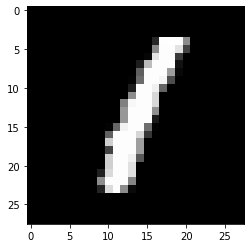

In [3]:
# Display Image
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

digit = 105 # Change to choose new digit
a = x_train[digit]
plt.imshow(a, cmap='gray', interpolation='nearest')
print("Image (#{}): Which is digit '{}'".format(digit,y_train[digit]))

<Figure size 432x288 with 0 Axes>

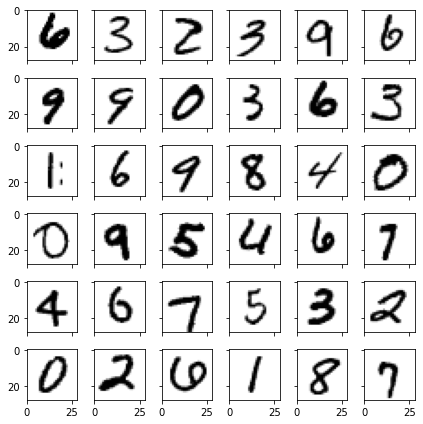

In [4]:
import random

ROWS = 6
random_indices = random.sample(range(x_train.shape[0]), ROWS*ROWS)

sample_images = x_train[random_indices, :]

plt.clf()

fig, axes = plt.subplots(ROWS,ROWS, 
                         figsize=(ROWS,ROWS),
                         sharex=True, sharey=True) 

for i in range(ROWS*ROWS):
    subplot_row = i//ROWS 
    subplot_col = i%ROWS
    ax = axes[subplot_row, subplot_col]

    plottable_image = np.reshape(sample_images[i,:], (28,28))
    ax.imshow(plottable_image, cmap='gray_r')
    
    ax.set_xbound([0,28])

plt.tight_layout()
plt.show()

In [5]:
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255
x_test /=255
print('x_train shape:', x_train.shape)
print("Training samples: {}".format(x_train.shape[0]))
print("Test samples: {}".format(x_test.shape[0]))
# Convert class vectors to binary class matrices
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

x_train shape: (60000, 28, 28, 1)
Training samples: 60000
Test samples: 10000


# Training/Fitting CNN - DIGITS
The following code will train the CNN for 20,000 steps. This can take awhile, you might want to scale the step count back. GPU training can help. My results:



In [6]:
import tensorflow as tf
import time
tf.config.list_physical_devices('GPU')
start_time = time.time()

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

elapsed_time = time.time() - start_time
#print("Elapsed time: {}".format(hms_string(elapsed_time)))

Epoch 1/12
469/469 - 2s - loss: 0.2491 - accuracy: 0.9241 - val_loss: 0.0545 - val_accuracy: 0.9825
Epoch 2/12
469/469 - 2s - loss: 0.0879 - accuracy: 0.9731 - val_loss: 0.0401 - val_accuracy: 0.9860
Epoch 3/12
469/469 - 2s - loss: 0.0649 - accuracy: 0.9811 - val_loss: 0.0313 - val_accuracy: 0.9894
Epoch 4/12
469/469 - 2s - loss: 0.0551 - accuracy: 0.9834 - val_loss: 0.0294 - val_accuracy: 0.9905
Epoch 5/12
469/469 - 2s - loss: 0.0478 - accuracy: 0.9848 - val_loss: 0.0368 - val_accuracy: 0.9883
Epoch 6/12
469/469 - 2s - loss: 0.0410 - accuracy: 0.9864 - val_loss: 0.0274 - val_accuracy: 0.9910
Epoch 7/12
469/469 - 2s - loss: 0.0368 - accuracy: 0.9889 - val_loss: 0.0316 - val_accuracy: 0.9899
Epoch 8/12
469/469 - 2s - loss: 0.0360 - accuracy: 0.9890 - val_loss: 0.0277 - val_accuracy: 0.9906
Epoch 9/12
469/469 - 2s - loss: 0.0289 - accuracy: 0.9905 - val_loss: 0.0300 - val_accuracy: 0.9910
Epoch 10/12
469/469 - 2s - loss: 0.0278 - accuracy: 0.9907 - val_loss: 0.0272 - val_accuracy: 0.9912

In [7]:
# Predict using either GPU or CPU, send the entire dataset.  This might not work on the GPU.
# Set the desired TensorFlow output level for this example
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

Test loss: 0.026847921311855316
Test accuracy: 0.9930999875068665


GPUs are most often used for training rather than prediction. For prediction either disable the GPU or just predict on a smaller sample. If your GPU has enough memory, the above prediction code may work just fine. If not, just prediction on a sample with the following code:

In [8]:
from sklearn import metrics

# For GPU just grab the first 100 images
small_x = x_test[1:100]
small_y = y_test[1:100]
small_y2 = np.argmax(small_y,axis=1)
pred = model.predict(small_x)
pred = np.argmax(pred,axis=1)
score = metrics.accuracy_score(small_y2, pred)
print('Accuracy: {}'.format(score))

Accuracy: 1.0


# MNIST Fashion Data Set
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits. This data can be seen in Figure 6.MNIST-FASHION.



In [9]:
import tensorflow.keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print()
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


# Display the Apparel
The following code shows what the Fashion MNIST files contain.

In [10]:
# Display as text
from IPython.display import display
import pandas as pd

print("Shape for dataset: {}".format(x_train.shape))
print("Labels: {}".format(y_train))

# Single MNIST digit
single = x_train[0]
print("Shape for single: {}".format(single.shape))

pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 10)
pd.DataFrame(single.reshape(28,28))

Shape for dataset: (60000, 28, 28)
Labels: [9 0 0 ... 3 0 5]
Shape for single: (28, 28)


,0,1,2,...,25,26,27
0,0,0,0,...,0,0,0
1,0,0,0,...,0,0,0
2,0,0,0,...,0,0,0
3,0,0,0,...,1,1,0
4,0,0,0,...,0,0,3
...,...,...,...,...,...,...,...
23,0,0,74,...,216,170,0
24,2,0,0,...,58,0,0
25,0,0,0,...,0,0,0
26,0,0,0,...,0,0,0


Image (#90): Which is digit '9'


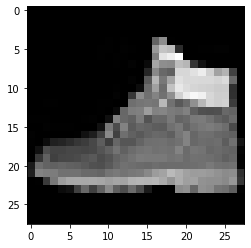

In [11]:
# Display as image
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
digit = 90 # Change to choose new article
a = x_train[digit]
plt.imshow(a, cmap='gray', interpolation='nearest')
print("Image (#{}): Which is digit '{}'".format(digit,y_train[digit]))

<Figure size 432x288 with 0 Axes>

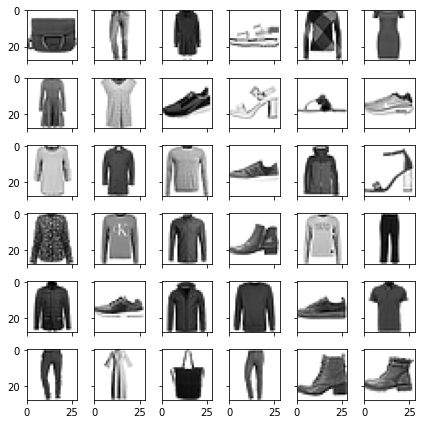

In [12]:
import random

ROWS = 6
random_indices = random.sample(range(x_train.shape[0]), ROWS*ROWS)

sample_images = x_train[random_indices, :]

plt.clf()

fig, axes = plt.subplots(ROWS,ROWS, 
                         figsize=(ROWS,ROWS),
                         sharex=True, sharey=True) 

for i in range(ROWS*ROWS):
    subplot_row = i//ROWS 
    subplot_col = i%ROWS
    ax = axes[subplot_row, subplot_col]

    plottable_image = np.reshape(sample_images[i,:], (28,28))
    ax.imshow(plottable_image, cmap='gray_r')
    
    ax.set_xbound([0,28])

plt.tight_layout()
plt.show()

In [13]:
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
batch_size = 128
num_classes = 10
epochs = 12
# input image dimensions
img_rows, img_cols = 28, 28
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print("Training samples: {}".format(x_train.shape[0]))
print("Test samples: {}".format(x_test.shape[0]))
# convert class vectors to binary class matrices
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

x_train shape: (60000, 28, 28, 1)
Training samples: 60000
Test samples: 10000


In [14]:
import tensorflow as tf
import time
tf.config.list_physical_devices('GPU')
start_time = time.time()

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

elapsed_time = time.time() - start_time

Epoch 1/12
469/469 - 2s - loss: 0.5296 - accuracy: 0.8112 - val_loss: 0.3340 - val_accuracy: 0.8810
Epoch 2/12
469/469 - 2s - loss: 0.3413 - accuracy: 0.8787 - val_loss: 0.2831 - val_accuracy: 0.8982
Epoch 3/12
469/469 - 2s - loss: 0.2921 - accuracy: 0.8939 - val_loss: 0.2567 - val_accuracy: 0.9058
Epoch 4/12
469/469 - 2s - loss: 0.2620 - accuracy: 0.9051 - val_loss: 0.2381 - val_accuracy: 0.9124
Epoch 5/12
469/469 - 2s - loss: 0.2385 - accuracy: 0.9141 - val_loss: 0.2324 - val_accuracy: 0.9156
Epoch 6/12
469/469 - 2s - loss: 0.2172 - accuracy: 0.9199 - val_loss: 0.2212 - val_accuracy: 0.9210
Epoch 7/12
469/469 - 2s - loss: 0.2013 - accuracy: 0.9261 - val_loss: 0.2186 - val_accuracy: 0.9221
Epoch 8/12
469/469 - 2s - loss: 0.1896 - accuracy: 0.9308 - val_loss: 0.2117 - val_accuracy: 0.9201
Epoch 9/12
469/469 - 2s - loss: 0.1772 - accuracy: 0.9344 - val_loss: 0.2157 - val_accuracy: 0.9242
Epoch 10/12
469/469 - 2s - loss: 0.1643 - accuracy: 0.9395 - val_loss: 0.2107 - val_accuracy: 0.9248